In [1]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib
from matplotlib import font_manager, rc
import platform

matplotlib.rcParams['axes.unicode_minus'] = False

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [5]:
df = pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_2.csv',encoding='cp949')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58059 entries, 0 to 58058
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   사고유형         58059 non-null  object
 1   연령가해자        58059 non-null  object
 2   법규위반가해자      58059 non-null  object
 3   행동유형가해자      58059 non-null  object
 4   피해자신체상해주부위   58059 non-null  object
 5   차량용도가해자_중분류  58059 non-null  object
 6   도로종류         58059 non-null  object
 7   도로형태         58059 non-null  object
 8   도로선형         58059 non-null  object
 9   발생시각         58059 non-null  object
 10  EPDO1        58059 non-null  int64 
 11  EPDO2        58059 non-null  int64 
 12  심각도          58059 non-null  int64 
dtypes: int64(3), object(10)
memory usage: 5.8+ MB


 # 첫 번째 괄호는 유의수준 0.05로 기각 / 두 번째 괄호는 유의수준 0.01로 기각

# ■ 1. 사고유형

## 1.1 EPDO1 ~ 사고유형 (O) / (O)

In [7]:
model = ols('EPDO1 ~ C(사고유형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(사고유형),4.0,2.908499e+06,727124.787070,160.369261,9.369877e-137
Residual,58054.0,2.632207e+08,4534.065834,NaN,NaN


In [8]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['사고유형'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
        기타 길가장자리구역통행중   3.3741 0.0333  0.1686  6.5796   True
        기타      보도통행중   2.7777 0.3304 -1.2617  6.8172  False
        기타      차도통행중   12.292  0.001  9.5161  15.068   True
        기타        횡단중  15.4596  0.001 13.7062 17.2131   True
길가장자리구역통행중      보도통행중  -0.5964    0.9 -5.3785  4.1858  False
길가장자리구역통행중      차도통행중   8.9179  0.001   5.142 12.6939   True
길가장자리구역통행중        횡단중  12.0856  0.001  8.9829 15.1882   True
     보도통행중      차도통행중   9.5143  0.001  5.0088 14.0198   True
     보도통행중        횡단중  12.6819  0.001  8.7236 16.6402   True
     차도통행중        횡단중   3.1676 0.0101  0.5111  5.8241   True
------------------------------------------------------------


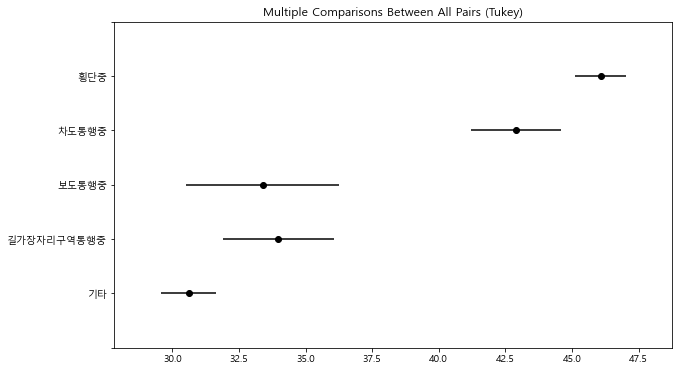

In [9]:
fig = posthoc.plot_simultaneous()

## 1.2 EPDO2 ~ 사고유형 (O) / (O)

In [10]:
model = ols('EPDO2 ~ C(사고유형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(사고유형),4.0,5525.371033,1381.342758,211.159732,3.394978e-180
Residual,58054.0,379771.615791,6.541696,NaN,NaN


In [11]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['사고유형'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
        기타 길가장자리구역통행중   0.0617 0.6207   -0.06 0.1835  False
        기타      보도통행중   0.2072 0.0021  0.0538 0.3606   True
        기타      차도통행중   0.4295  0.001  0.3241  0.535   True
        기타        횡단중   0.6749  0.001  0.6083 0.7415   True
길가장자리구역통행중      보도통행중   0.1455 0.1852 -0.0362 0.3271  False
길가장자리구역통행중      차도통행중   0.3678  0.001  0.2244 0.5112   True
길가장자리구역통행중        횡단중   0.6131  0.001  0.4953  0.731   True
     보도통행중      차도통행중   0.2223 0.0036  0.0512 0.3935   True
     보도통행중        횡단중   0.4676  0.001  0.3173  0.618   True
     차도통행중        횡단중   0.2453  0.001  0.1444 0.3462   True
-----------------------------------------------------------


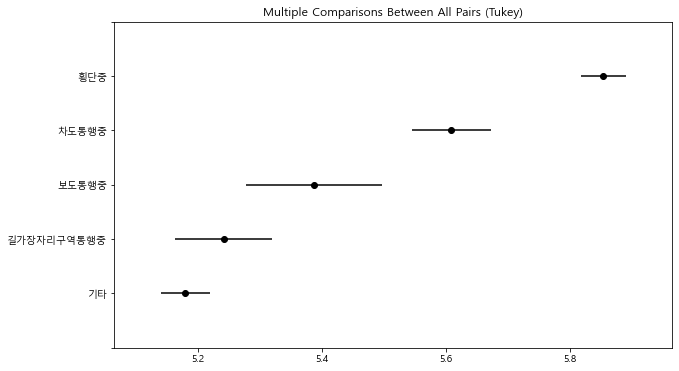

In [13]:
fig = posthoc.plot_simultaneous()

## 1.3 심각도 ~ 사고유형 (O) / (O)

In [14]:
model = ols('심각도 ~ C(사고유형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(사고유형),4.0,227.230028,56.807507,261.380154,5.007495e-223
Residual,58054.0,12617.266329,0.217337,NaN,NaN


In [19]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['사고유형'], alpha=0.05)
print(posthoc)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1     group2   meandiff p-adj   lower  upper  reject
-----------------------------------------------------------
        기타 길가장자리구역통행중  -0.0041    0.9 -0.0263 0.0181  False
        기타      보도통행중   0.0339 0.0083   0.006 0.0619   True
        기타      차도통행중   0.0681  0.001  0.0489 0.0873   True
        기타        횡단중   0.1339  0.001  0.1218  0.146   True
길가장자리구역통행중      보도통행중    0.038  0.015  0.0049 0.0711   True
길가장자리구역통행중      차도통행중   0.0722  0.001   0.046 0.0983   True
길가장자리구역통행중        횡단중    0.138  0.001  0.1165 0.1595   True
     보도통행중      차도통행중   0.0342 0.0236   0.003 0.0653   True
     보도통행중        횡단중      0.1  0.001  0.0726 0.1274   True
     차도통행중        횡단중   0.0658  0.001  0.0474 0.0842   True
-----------------------------------------------------------


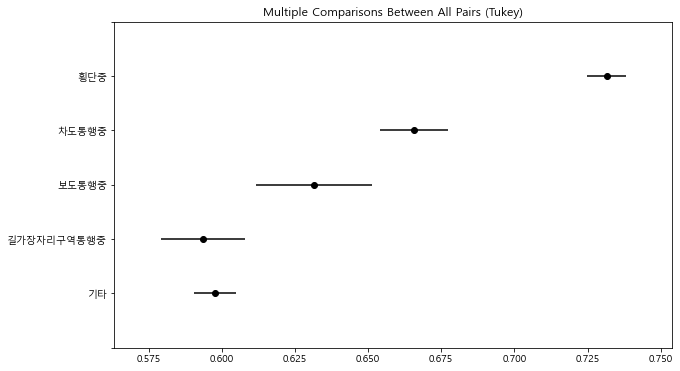

In [20]:
fig = posthoc.plot_simultaneous()

---

# ■ 2. 연령가해자

## 2.1 EPDO1 ~ 연령가해자 (O) / (O)

In [18]:
model = ols('EPDO1 ~ C(연령가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(연령가해자),7.0,1.492258e+06,213179.666295,46.763293,1.355129e-66
Residual,58051.0,2.646369e+08,4558.696654,NaN,NaN


In [21]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['연령가해자'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 20세이하 21-30세   8.0831 0.0014   2.0187  14.1476   True
 20세이하 31-40세   8.6917  0.001   2.8933    14.49   True
 20세이하 41-50세   9.2127  0.001   3.5459  14.8795   True
 20세이하 51-60세   9.5788  0.001   3.9654  15.1923   True
 20세이하 61-64세  10.1983  0.001   4.0818  16.3148   True
 20세이하  65세이상   9.4494  0.001   3.6207  15.2782   True
 20세이하  기타/불명 -20.7356  0.001 -28.1794 -13.2918   True
21-30세 31-40세   0.6085    0.9   -2.968   4.1851  False
21-30세 41-50세   1.1295    0.9  -2.2296   4.4886  False
21-30세 51-60세   1.4957 0.8502  -1.7726   4.7639  False
21-30세 61-64세   2.1151 0.7382   -1.957   6.1873  False
21-30세  65세이상   1.3663    0.9  -2.2593   4.9919  False
21-30세  기타/불명 -28.8188  0.001 -34.6994 -22.9382   True
31-40세 41-50세    0.521    0.9  -2.3298   3.3718  False
31-40세 51-60세   0.8871    0.9  -1.8561   3.6303  False
31-40세 61-

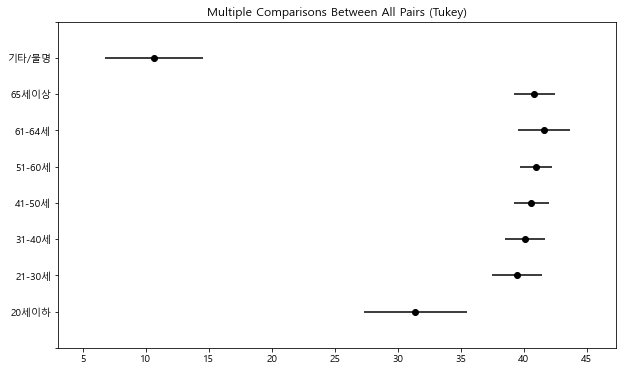

In [22]:
fig = posthoc.plot_simultaneous()

## 2.2 EPDO2 ~ 연령가해자 (O) / (O)

In [24]:
model = ols('EPDO2 ~ C(연령가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(연령가해자),7.0,4683.425993,669.060856,102.044845,4.849148e-149
Residual,58051.0,380613.560831,6.556538,NaN,NaN


In [25]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['연령가해자'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 20세이하 21-30세   0.1494 0.5027 -0.0806  0.3793  False
 20세이하 31-40세   0.0913    0.9 -0.1286  0.3112  False
 20세이하 41-50세   0.1225 0.6469 -0.0925  0.3374  False
 20세이하 51-60세   0.1205  0.654 -0.0924  0.3333  False
 20세이하 61-64세   0.1553 0.4639 -0.0766  0.3873  False
 20세이하  65세이상   0.1933 0.1379 -0.0278  0.4143  False
 20세이하  기타/불명  -1.6049  0.001 -1.8872 -1.3226   True
21-30세 31-40세   -0.058    0.9 -0.1937  0.0776  False
21-30세 41-50세  -0.0269    0.9 -0.1543  0.1005  False
21-30세 51-60세  -0.0289    0.9 -0.1528  0.0951  False
21-30세 61-64세    0.006    0.9 -0.1485  0.1604  False
21-30세  65세이상   0.0439    0.9 -0.0936  0.1814  False
21-30세  기타/불명  -1.7543  0.001 -1.9773 -1.5312   True
31-40세 41-50세   0.0311    0.9  -0.077  0.1393  False
31-40세 51-60세   0.0292    0.9 -0.0749  0.1332  False
31-40세 61-64세    0.064 0.8448  -0.075   0.203 

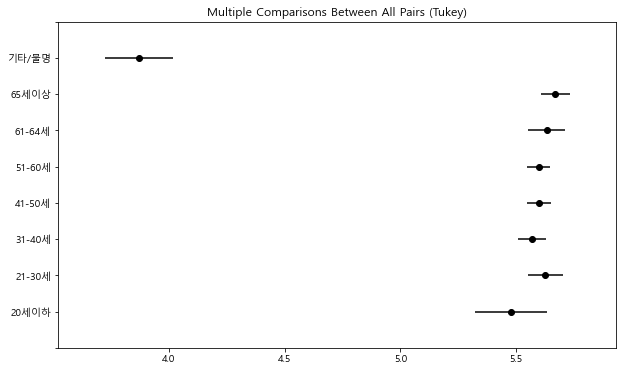

In [26]:
fig = posthoc.plot_simultaneous()

## 2.3 심각도 ~ 연령가해자 (O) / (O)

In [27]:
model = ols('심각도 ~ C(연령가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(연령가해자),7.0,241.244707,34.463530,158.740174,2.051534e-233
Residual,58051.0,12603.251650,0.217107,NaN,NaN


In [28]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['연령가해자'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 20세이하 21-30세    0.045 0.0249  0.0031  0.0868   True
 20세이하 31-40세   0.0394  0.057 -0.0006  0.0794  False
 20세이하 41-50세   0.0471 0.0064   0.008  0.0862   True
 20세이하 51-60세   0.0409 0.0302  0.0021  0.0796   True
 20세이하 61-64세   0.0458 0.0227  0.0036   0.088   True
 20세이하  65세이상   0.0522 0.0021   0.012  0.0925   True
 20세이하  기타/불명  -0.3503  0.001 -0.4017  -0.299   True
21-30세 31-40세  -0.0055    0.9 -0.0302  0.0191  False
21-30세 41-50세   0.0021    0.9  -0.021  0.0253  False
21-30세 51-60세  -0.0041    0.9 -0.0267  0.0184  False
21-30세 61-64세   0.0008    0.9 -0.0273  0.0289  False
21-30세  65세이상   0.0073    0.9 -0.0178  0.0323  False
21-30세  기타/불명  -0.3953  0.001 -0.4359 -0.3547   True
31-40세 41-50세   0.0077    0.9  -0.012  0.0274  False
31-40세 51-60세   0.0014    0.9 -0.0175  0.0204  False
31-40세 61-64세   0.0063    0.9 -0.0189  0.0316 

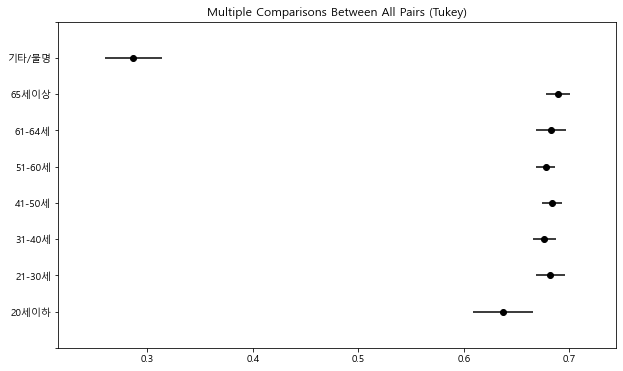

In [29]:
fig = posthoc.plot_simultaneous()

---

# ■ 3. 법규위반가해자

## 3.1 EPDO1 ~ 법규위반가해자 (O) / (O)

In [30]:
model = ols('EPDO1 ~ C(법규위반가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(법규위반가해자),7.0,9.400558e+06,1.342937e+06,303.662432,0.0
Residual,58051.0,2.567286e+08,4.422466e+03,NaN,NaN


In [31]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['법규위반가해자'], alpha=0.05)
print(posthoc)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05        
   group1      group2    meandiff p-adj    lower     upper   reject
-------------------------------------------------------------------
         과속 교차로 통행방법 위반 -168.3378  0.001  -182.488 -154.1876   True
         과속          기타 -168.5229  0.001 -179.7959 -157.2498   True
         과속 보행자 보호의무 위반 -157.8471  0.001 -168.6871  -147.007   True
         과속        신호위반 -155.3343  0.001 -166.5757  -144.093   True
         과속    안전거리 미확보 -152.5228  0.001 -177.3107 -127.7349   True
         과속 안전운전 의무 불이행 -154.3275  0.001 -164.9965 -143.6585   True
         과속      중앙선 침범 -145.5694  0.001  -158.617 -132.5218   True
교차로 통행방법 위반          기타    -0.185    0.9  -10.2646    9.8946  False
교차로 통행방법 위반 보행자 보호의무 위반   10.4908 0.0207    0.8979   20.0836   True
교차로 통행방법 위반        신호위반   13.0035 0.0022    2.9594   23.0476   True
교차로 통행방법 위반    안전거리 미확보    15.815 0.4985   -8.4534   40.0834  False
교차로 통행방법 위반 안전운전 의무 불이행   14.0103  0.001    4.61

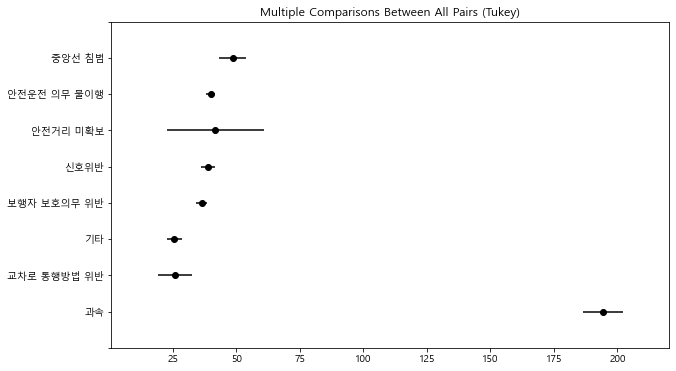

In [32]:
fig = posthoc.plot_simultaneous()

## 3.2 EPDO2 ~ 법규위반가해자 (O) / (O)

In [33]:
model = ols('EPDO2 ~ C(법규위반가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(법규위반가해자),7.0,10021.985890,1431.712270,221.470465,0.0
Residual,58051.0,375275.000934,6.464574,NaN,NaN


In [34]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['법규위반가해자'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
         과속 교차로 통행방법 위반  -5.3968  0.001 -5.9378 -4.8558   True
         과속          기타  -5.4433  0.001 -5.8743 -5.0123   True
         과속 보행자 보호의무 위반  -4.9179  0.001 -5.3324 -4.5035   True
         과속        신호위반  -4.7255  0.001 -5.1553 -4.2957   True
         과속    안전거리 미확보  -5.2407  0.001 -6.1885  -4.293   True
         과속 안전운전 의무 불이행  -4.9742  0.001 -5.3821 -4.5663   True
         과속      중앙선 침범  -4.3856  0.001 -4.8844 -3.8867   True
교차로 통행방법 위반          기타  -0.0465    0.9 -0.4319  0.3389  False
교차로 통행방법 위반 보행자 보호의무 위반   0.4788 0.0019  0.1121  0.8456   True
교차로 통행방법 위반        신호위반   0.6713  0.001  0.2873  1.0553   True
교차로 통행방법 위반    안전거리 미확보    0.156    0.9 -0.7718  1.0839  False
교차로 통행방법 위반 안전운전 의무 불이행   0.4226 0.0087  0.0633   0.782   True
교차로 통행방법 위반      중앙선 침범   1.0112  0.001  0.5512  1.4712

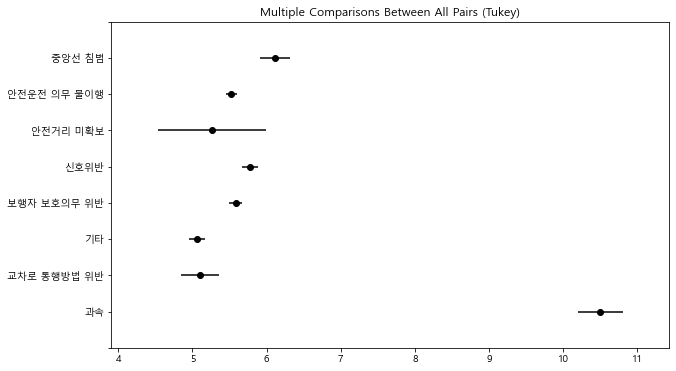

In [35]:
fig = posthoc.plot_simultaneous()

## 3.3 심각도 ~ 법규위반가해자 (O) / (O)

In [36]:
model = ols('심각도 ~ C(법규위반가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(법규위반가해자),7.0,104.763815,14.966259,68.19659,1.519561e-98
Residual,58051.0,12739.732543,0.219458,NaN,NaN


In [37]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['법규위반가해자'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
         과속 교차로 통행방법 위반  -0.3388  0.001 -0.4385 -0.2391   True
         과속          기타  -0.4108  0.001 -0.4902 -0.3314   True
         과속 보행자 보호의무 위반  -0.2698  0.001 -0.3461 -0.1934   True
         과속        신호위반  -0.2561  0.001 -0.3353  -0.177   True
         과속    안전거리 미확보  -0.4676  0.001 -0.6422  -0.293   True
         과속 안전운전 의무 불이행  -0.3279  0.001  -0.403 -0.2527   True
         과속      중앙선 침범  -0.2262  0.001 -0.3181 -0.1343   True
교차로 통행방법 위반          기타   -0.072  0.044  -0.143  -0.001   True
교차로 통행방법 위반 보행자 보호의무 위반    0.069 0.0412  0.0015  0.1366   True
교차로 통행방법 위반        신호위반   0.0827 0.0095  0.0119  0.1534   True
교차로 통행방법 위반    안전거리 미확보  -0.1288 0.3028 -0.2997  0.0422  False
교차로 통행방법 위반 안전운전 의무 불이행   0.0109    0.9 -0.0553  0.0771  False
교차로 통행방법 위반      중앙선 침범   0.1126 0.0015  0.0278  0.1973

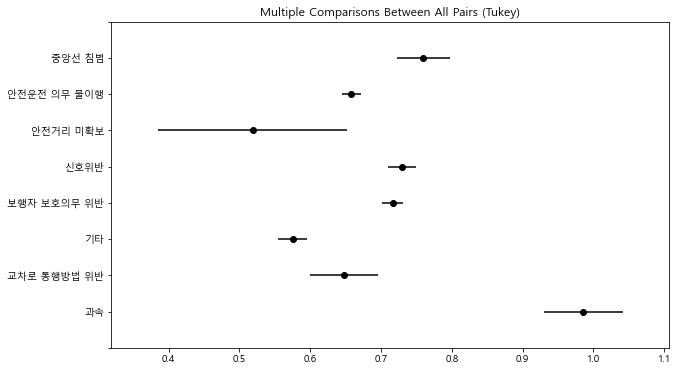

In [38]:
fig = posthoc.plot_simultaneous()

---

# ■ 4. 행동유형가해자

## 4.1 EPDO1 ~ 행동유형가해자 (O) / (O)

In [39]:
model = ols('EPDO1 ~ C(행동유형가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(행동유형가해자),9.0,5.580604e+06,620067.154920,138.148065,3.520941e-259
Residual,58049.0,2.605486e+08,4488.424481,NaN,NaN


In [40]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['행동유형가해자'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1  group2 meandiff p-adj   lower    upper   reject
--------------------------------------------------------
    U턴중   기타/불명 -16.3136  0.001 -27.0014  -5.6259   True
    U턴중   앞지르기중  14.9721  0.742 -12.1799   42.124  False
    U턴중   좌우회전중  -0.1339    0.9 -10.0409   9.7731  False
    U턴중   주ㆍ정차중 -12.5445 0.0438 -24.9165  -0.1726   True
    U턴중 주행 중 대기 -15.8208 0.2182 -35.0829   3.4412  False
    U턴중     직진중  15.5043  0.001   5.6656  25.3431   True
    U턴중   진로변경중  25.9439 0.0016   5.9698  45.9179   True
    U턴중     출발중   1.1991    0.9 -11.6606  14.0588  False
    U턴중     후진중  -4.2867    0.9 -14.4792   5.9058  False
  기타/불명   앞지르기중  31.2857 0.0046   5.5821  56.9893   True
  기타/불명   좌우회전중  16.1797  0.001  11.5324  20.8269   True
  기타/불명   주ㆍ정차중   3.7691    0.9  -4.9781  12.5162  False
  기타/불명 주행 중 대기   0.4928    0.9 -16.6675   17.653  False
  기타/불명     직진중   31.818  0.001   27.318  36.3179   True
  기타/불명   진로변경중  42.2575  0.001

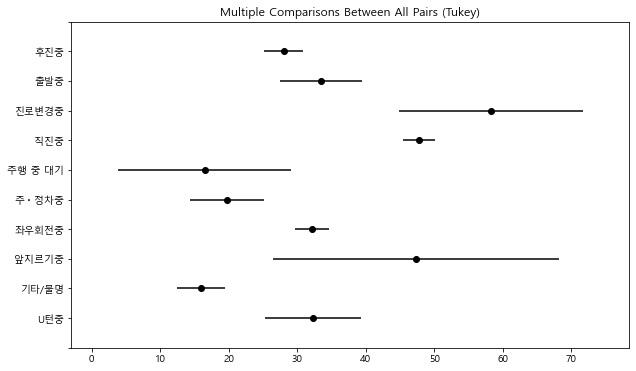

In [41]:
fig = posthoc.plot_simultaneous()

## 4.2 EPDO2 ~ 행동유형가해자 (O) / (O)

In [42]:
model = ols('EPDO2 ~ C(행동유형가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(행동유형가해자),9.0,9489.431322,1054.381258,162.864681,3.871565e-306
Residual,58049.0,375807.555501,6.473971,NaN,NaN


In [43]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['행동유형가해자'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
    U턴중   기타/불명  -0.9868  0.001 -1.3927 -0.5809   True
    U턴중   앞지르기중   0.6925 0.5082 -0.3387  1.7237  False
    U턴중   좌우회전중   0.0189    0.9 -0.3573  0.3952  False
    U턴중   주ㆍ정차중  -0.7367  0.001 -1.2066 -0.2668   True
    U턴중 주행 중 대기  -0.9331 0.0022 -1.6647 -0.2016   True
    U턴중     직진중   0.5143  0.001  0.1407   0.888   True
    U턴중   진로변경중    0.974  0.002  0.2154  1.7326   True
    U턴중     출발중  -0.1167    0.9 -0.6051  0.3717  False
    U턴중     후진중  -0.3097 0.2517 -0.6968  0.0774  False
  기타/불명   앞지르기중   1.6793  0.001  0.7031  2.6555   True
  기타/불명   좌우회전중   1.0057  0.001  0.8292  1.1822   True
  기타/불명   주ㆍ정차중   0.2501  0.337 -0.0821  0.5823  False
  기타/불명 주행 중 대기   0.0537    0.9 -0.5981  0.7054  False
  기타/불명     직진중   1.5011  0.001  1.3302   1.672   True
  기타/불명   진로변경중   1.9608  0.001  1.2789  2.6427   True
  기타/불명   

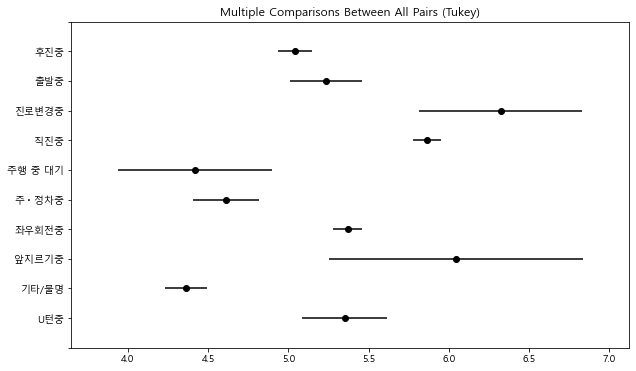

In [44]:
fig = posthoc.plot_simultaneous()

## 4.3 심각도 ~ 행동유형가해자 (O) / (O)

In [45]:
model = ols('심각도 ~ C(행동유형가해자)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(행동유형가해자),9.0,281.456790,31.272977,144.500462,2.917136e-271
Residual,58049.0,12563.039567,0.216421,NaN,NaN


In [46]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['행동유형가해자'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
    U턴중   기타/불명  -0.2939  0.001 -0.3681 -0.2197   True
    U턴중   앞지르기중   0.0036    0.9 -0.1849  0.1921  False
    U턴중   좌우회전중  -0.0084    0.9 -0.0772  0.0604  False
    U턴중   주ㆍ정차중  -0.2278  0.001 -0.3138 -0.1419   True
    U턴중 주행 중 대기  -0.2792  0.001  -0.413 -0.1455   True
    U턴중     직진중   0.0034    0.9 -0.0649  0.0718  False
    U턴중   진로변경중   0.0063    0.9 -0.1324   0.145  False
    U턴중     출발중  -0.0687 0.3063  -0.158  0.0206  False
    U턴중     후진중   -0.106  0.001 -0.1768 -0.0352   True
  기타/불명   앞지르기중   0.2975  0.001   0.119   0.476   True
  기타/불명   좌우회전중   0.2855  0.001  0.2532  0.3177   True
  기타/불명   주ㆍ정차중    0.066 0.0207  0.0053  0.1268   True
  기타/불명 주행 중 대기   0.0147    0.9 -0.1045  0.1338  False
  기타/불명     직진중   0.2973  0.001  0.2661  0.3286   True
  기타/불명   진로변경중   0.3002  0.001  0.1755  0.4249   True
  기타/불명   

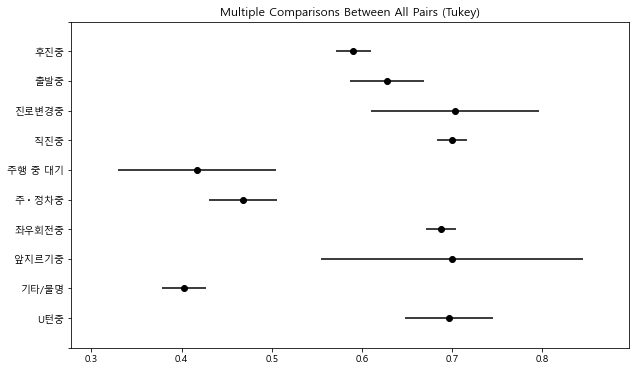

In [47]:
fig = posthoc.plot_simultaneous()

---

# ■ 5. 피해자신체상해주부위

## 5.1 EPDO1 ~ 피해자신체상해주부위 (O) / (O)

In [50]:
model = ols('EPDO1 ~ C(피해자신체상해주부위)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(피해자신체상해주부위),17.0,2.915341e+07,1.714906e+06,420.021412,0.0
Residual,58041.0,2.369757e+08,4.082903e+03,NaN,NaN


In [51]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['피해자신체상해주부위'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------------------
    가슴     기타  -20.0392  0.001  -24.3114  -15.767   True
    가슴    대퇴부  -21.0802  0.001  -26.1641 -15.9963   True
    가슴     뒷목  -35.1088  0.001  -42.7036 -27.5141   True
    가슴      등  -26.6396  0.001  -38.5778 -14.7013   True
    가슴     머리     34.88  0.001   30.2037  39.5562   True
    가슴      목  -31.1275  0.001   -40.523  -21.732   True
    가슴      발  -33.5931  0.001  -38.4022  -28.784   True
    가슴      배   58.9485  0.001   45.0021   72.895   True
    가슴     불명   -2.4413    0.9  -19.2664  14.3838  False
    가슴   상해없음  -44.5478  0.001  -64.5406  -24.555   True
    가슴      손  -37.1293  0.001  -45.3397 -28.9189   True
    가슴     앞목   -26.342  0.001  -45.3681  -7.3159   True
    가슴     어깨  -36.5929  0.001  -42.9366 -30.2492   True
    가슴     얼굴     0.841    0.9   -5.0221   6.7041  False
    가슴      팔  -39.5518  0.001 

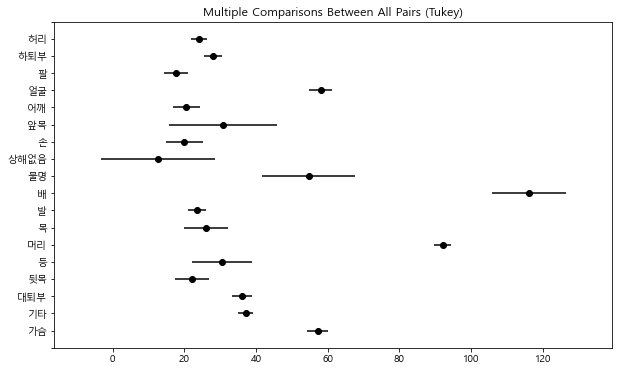

In [52]:
fig = posthoc.plot_simultaneous()

## 5.2 EPDO2 ~ 피해자신체상해주부위 (O) / (O)

In [53]:
model = ols('EPDO2 ~ C(피해자신체상해주부위)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(피해자신체상해주부위),17.0,31445.916046,1849.759767,303.409868,0.0
Residual,58041.0,353851.070778,6.096571,NaN,NaN


In [54]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['피해자신체상해주부위'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    가슴     기타  -0.9728  0.001 -1.1379 -0.8077   True
    가슴    대퇴부  -0.7132  0.001 -0.9097 -0.5168   True
    가슴     뒷목  -1.8139  0.001 -2.1073 -1.5204   True
    가슴      등  -1.2442  0.001 -1.7055 -0.7829   True
    가슴     머리   0.7554  0.001  0.5747  0.9361   True
    가슴      목  -1.4968  0.001 -1.8599 -1.1338   True
    가슴      발  -1.2314  0.001 -1.4172 -1.0456   True
    가슴      배   1.3952  0.001  0.8563  1.9341   True
    가슴     불명  -0.7821 0.0036 -1.4323  -0.132   True
    가슴   상해없음  -1.8278  0.001 -2.6003 -1.0552   True
    가슴      손  -1.5702  0.001 -1.8874 -1.2529   True
    가슴     앞목  -1.4791  0.001 -2.2143 -0.7439   True
    가슴     어깨  -1.5562  0.001 -1.8013 -1.3111   True
    가슴     얼굴  -0.3092  0.001 -0.5358 -0.0826   True
    가슴      팔  -1.8858  0.001 -2.1105 -1.6611   True
    가슴    하퇴부  -1.1155  0.001 -1.2993 -0.9317 

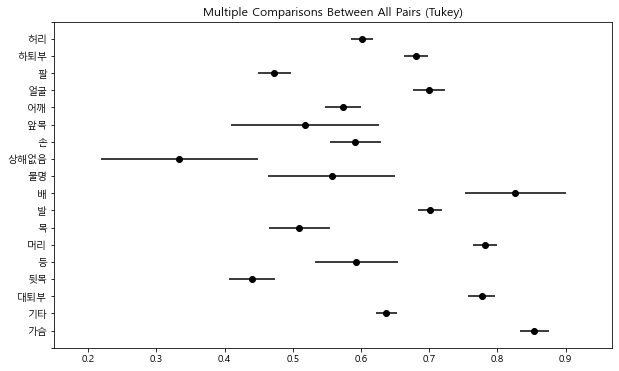

In [57]:
fig = posthoc.plot_simultaneous()

## 5.3 심각도 ~ 피해자신체상해주부위 (O) / (O)

In [55]:
model = ols('심각도 ~ C(피해자신체상해주부위)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(피해자신체상해주부위),17.0,540.031506,31.766559,149.845026,0.0
Residual,58041.0,12304.464851,0.211996,NaN,NaN


In [56]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['피해자신체상해주부위'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    가슴     기타  -0.2166  0.001 -0.2474 -0.1858   True
    가슴    대퇴부  -0.0771  0.001 -0.1138 -0.0405   True
    가슴     뒷목  -0.4142  0.001  -0.469 -0.3595   True
    가슴      등   -0.261  0.001  -0.347 -0.1749   True
    가슴     머리   -0.072  0.001 -0.1057 -0.0383   True
    가슴      목  -0.3441  0.001 -0.4118 -0.2764   True
    가슴      발  -0.1525  0.001 -0.1872 -0.1179   True
    가슴      배  -0.0277    0.9 -0.1282  0.0728  False
    가슴     불명   -0.297  0.001 -0.4182 -0.1757   True
    가슴   상해없음  -0.5204  0.001 -0.6645 -0.3763   True
    가슴      손  -0.2621  0.001 -0.3212 -0.2029   True
    가슴     앞목  -0.3363  0.001 -0.4734 -0.1992   True
    가슴     어깨  -0.2802  0.001 -0.3259 -0.2345   True
    가슴     얼굴  -0.1544  0.001 -0.1967 -0.1122   True
    가슴      팔  -0.3807  0.001 -0.4226 -0.3388   True
    가슴    하퇴부  -0.1728  0.001 -0.2071 -0.1385 

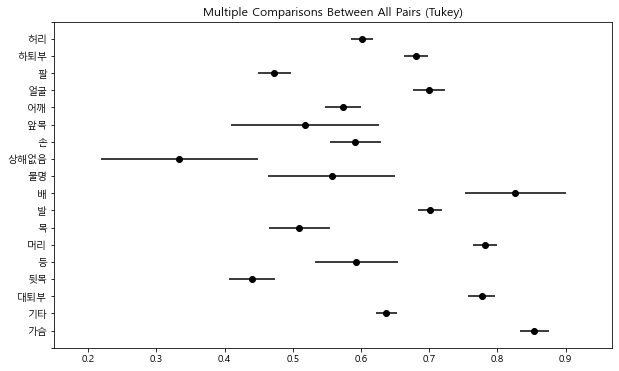

In [58]:
fig = posthoc.plot_simultaneous()

---

# ■ 6. 차량용도가해자_중분류

## 6.1 EPDO1 ~ 차량용도가해자_중분류 (O) / (O)

In [59]:
model = ols('EPDO1 ~ C(차량용도가해자_중분류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(차량용도가해자_중분류),23.0,4.517253e+06,196402.322613,43.569152,2.892819e-195
Residual,58035.0,2.616119e+08,4507.829821,NaN,NaN


In [60]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['차량용도가해자_중분류'], alpha=0.05)
print(posthoc)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1      group2   meandiff p-adj    lower    upper   reject
-----------------------------------------------------------------
개인형이동수단(PM)          기타  20.4329    0.9  -26.9686  67.8343  False
개인형이동수단(PM)     기타/건설기계   47.521  0.001   11.0208  84.0213   True
개인형이동수단(PM)        기타불명  -2.1725    0.9  -39.5106  35.1655  False
개인형이동수단(PM)        노선버스  19.3212    0.9  -16.5356  55.1779  False
개인형이동수단(PM)         농기계  32.0344 0.8463  -20.8664  84.9351  False
개인형이동수단(PM)        덤프트럭  55.2123 0.0104    5.8299 104.5948   True
개인형이동수단(PM)         렌터카  23.0908 0.7658  -13.0661  59.2476  False
개인형이동수단(PM)          버스   33.399 0.1421   -3.4907  70.2887  False
개인형이동수단(PM)          불명    -4.41    0.9  -41.0161  32.1961  False
개인형이동수단(PM)      비사업용기타  30.0168 0.3048    -6.569  66.6026  False
개인형이동수단(PM) 사륜오토바이(ATV)  13.7021    0.9  -36.6781  64.0823  False
개인형이동수단(PM)       사업용기타  27.2111 0.6018  -11.3272  65.7493  False
개인형이동수단(PM

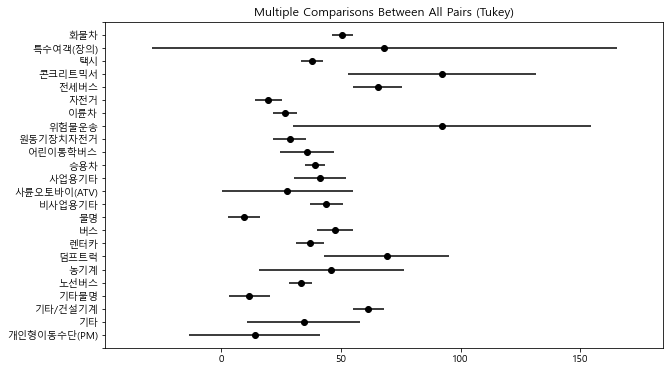

In [61]:
fig = posthoc.plot_simultaneous()

## 6.2 EPDO2 ~ 차량용도가해자_중분류 (O) / (O)

In [62]:
model = ols('EPDO2 ~ C(차량용도가해자_중분류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(차량용도가해자_중분류),23.0,7327.716438,318.596367,48.918633,5.525439e-221
Residual,58035.0,377969.270386,6.512781,NaN,NaN


In [63]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['차량용도가해자_중분류'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
개인형이동수단(PM)          기타   0.7251    0.9 -1.0766  2.5269  False
개인형이동수단(PM)     기타/건설기계   1.9106  0.001  0.5233   3.298   True
개인형이동수단(PM)        기타불명  -0.3719    0.9 -1.7911  1.0474  False
개인형이동수단(PM)        노선버스   0.9121 0.6914 -0.4508   2.275  False
개인형이동수단(PM)         농기계   1.4288 0.5908  -0.582  3.4396  False
개인형이동수단(PM)        덤프트럭   2.2478 0.0031  0.3708  4.1248   True
개인형이동수단(PM)         렌터카   1.0673 0.4237 -0.3071  2.4416  False
개인형이동수단(PM)          버스   1.4565 0.0309  0.0543  2.8587   True
개인형이동수단(PM)          불명  -0.5449    0.9 -1.9363  0.8465  False
개인형이동수단(PM)      비사업용기타   1.3872 0.0516 -0.0035  2.7778  False
개인형이동수단(PM) 사륜오토바이(ATV)   1.2128 0.7788 -0.7022  3.1277  False
개인형이동수단(PM)       사업용기타   1.3878 0.0913  -0.077  2.8527  False
개인형이동수단(PM)         승용차   1.2215 0.1482 -0.1337  2.5767

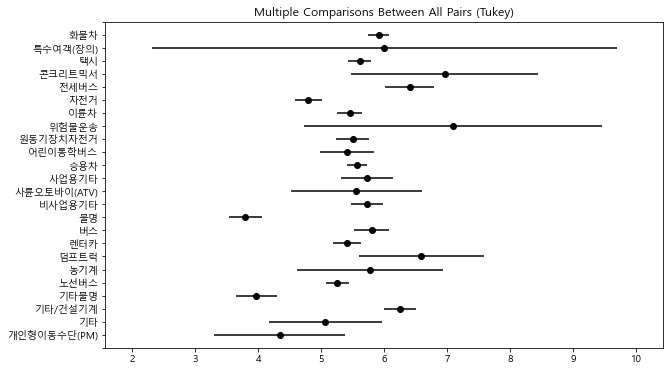

In [64]:
fig = posthoc.plot_simultaneous()

## 6.3 심각도 ~ 차량용도가해자_중분류 (O) / (O)

In [65]:
model = ols('심각도 ~ C(차량용도가해자_중분류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(차량용도가해자_중분류),23.0,294.173171,12.790138,59.143947,3.888919e-270
Residual,58035.0,12550.323186,0.216254,NaN,NaN


In [66]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['차량용도가해자_중분류'], alpha=0.05)
print(posthoc)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
개인형이동수단(PM)          기타   0.1318    0.9 -0.1965  0.4602  False
개인형이동수단(PM)     기타/건설기계   0.3308  0.001   0.078  0.5836   True
개인형이동수단(PM)        기타불명  -0.1069    0.9 -0.3655  0.1517  False
개인형이동수단(PM)        노선버스   0.1737 0.6181 -0.0747   0.422  False
개인형이동수단(PM)         농기계   0.2924 0.3625  -0.074  0.6588  False
개인형이동수단(PM)        덤프트럭    0.398 0.0053   0.056    0.74   True
개인형이동수단(PM)         렌터카   0.2084 0.2772  -0.042  0.4589  False
개인형이동수단(PM)          버스   0.2775 0.0164   0.022  0.5331   True
개인형이동수단(PM)          불명  -0.1627 0.7579 -0.4163  0.0908  False
개인형이동수단(PM)      비사업용기타   0.2776 0.0144  0.0242   0.531   True
개인형이동수단(PM) 사륜오토바이(ATV)   0.2979 0.2316 -0.0511  0.6468  False
개인형이동수단(PM)       사업용기타   0.2991 0.0101  0.0322   0.566   True
개인형이동수단(PM)         승용차   0.2546 0.0341  0.0077  0.5015

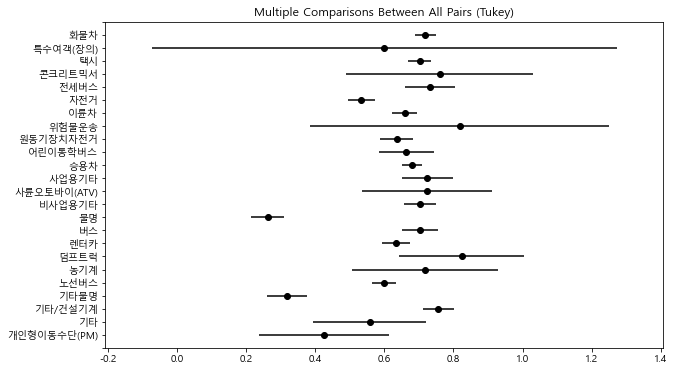

In [67]:
fig = posthoc.plot_simultaneous()

---

# ■ 7. 도로종류

## 7.1 EPDO1 ~ 도로종류 (O) / (O)

In [68]:
model = ols('EPDO1 ~ C(도로종류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로종류),6.0,6.233383e+06,1.038897e+06,232.054802,3.921757e-294
Residual,58052.0,2.598958e+08,4.476948e+03,NaN,NaN


In [69]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['도로종류'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
  고속국도     군도 -44.4025  0.001 -68.9602 -19.8447   True
  고속국도     기타 -61.6205  0.001 -86.0446 -37.1965   True
  고속국도     시도 -49.7092  0.001 -74.0353 -25.3831   True
  고속국도   일반국도 -16.4467 0.4332 -41.0019   8.1084  False
  고속국도    지방도 -33.1423 0.0013  -57.627  -8.6576   True
  고속국도 특별광역시도 -55.7516  0.001 -80.0681  -31.435   True
    군도     기타 -17.2181  0.001 -21.7217 -12.7144   True
    군도     시도  -5.3067 0.0014  -9.2445  -1.3689   True
    군도   일반국도  27.9557  0.001  22.7883  33.1232   True
    군도    지방도  11.2601  0.001   6.4385  16.0818   True
    군도 특별광역시도 -11.3491  0.001 -15.2275  -7.4707   True
    기타     시도  11.9114  0.001   8.9183  14.9045   True
    기타   일반국도  45.1738  0.001  40.6844  49.6632   True
    기타    지방도  28.4782  0.001  24.3916  32.5648   True
    기타 특별광역시도    5.869  0.001   2.9545   8.7835   True
    시도   일

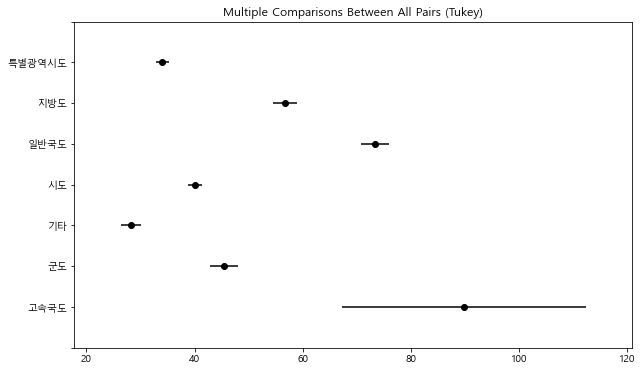

In [70]:
fig = posthoc.plot_simultaneous()

## 7.2 EPDO2 ~ 도로종류 (O) / (O)

In [72]:
model = ols('EPDO2 ~ C(도로종류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로종류),6.0,7326.804696,1221.134116,187.552566,1.457040e-237
Residual,58052.0,377970.182128,6.510890,NaN,NaN


In [73]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['도로종류'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  고속국도     군도  -1.7233  0.001 -2.6598 -0.7868   True
  고속국도     기타  -2.4687  0.001 -3.4001 -1.5373   True
  고속국도     시도   -1.945  0.001 -2.8727 -1.0173   True
  고속국도   일반국도  -0.8992 0.0697 -1.8356  0.0373  False
  고속국도    지방도  -1.4242  0.001 -2.3579 -0.4904   True
  고속국도 특별광역시도  -2.1695  0.001 -3.0968 -1.2422   True
    군도     기타  -0.7454  0.001 -0.9171 -0.5736   True
    군도     시도  -0.2217  0.001 -0.3719 -0.0715   True
    군도   일반국도   0.8242  0.001  0.6271  1.0212   True
    군도    지방도   0.2991  0.001  0.1153   0.483   True
    군도 특별광역시도  -0.4462  0.001 -0.5941 -0.2983   True
    기타     시도   0.5237  0.001  0.4095  0.6378   True
    기타   일반국도   1.5695  0.001  1.3983  1.7407   True
    기타    지방도   1.0445  0.001  0.8887  1.2004   True
    기타 특별광역시도   0.2992  0.001   0.188  0.4103   True
    시도   일반국도   1.0459  0.001  0.8963  1.1954 

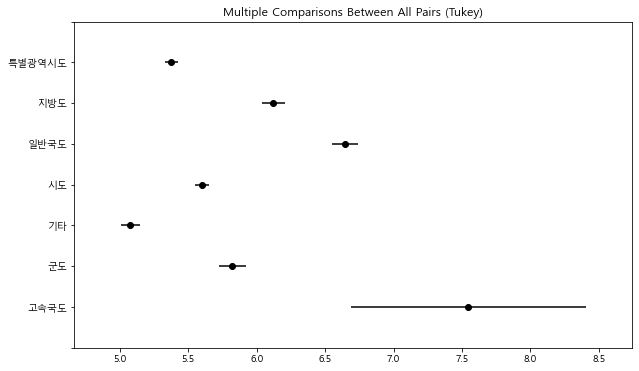

In [74]:
fig = posthoc.plot_simultaneous()

## 7.3 심각도 ~ 도로종류 (O) / (O)

In [75]:
model = ols('심각도 ~ C(도로종류)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로종류),6.0,91.190137,15.198356,69.181666,3.283291e-86
Residual,58052.0,12753.306220,0.219688,NaN,NaN


In [76]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['도로종류'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
  고속국도     군도  -0.0251    0.9 -0.1971  0.1469  False
  고속국도     기타  -0.1511  0.125 -0.3222    0.02  False
  고속국도     시도  -0.0578    0.9 -0.2282  0.1126  False
  고속국도   일반국도     0.02    0.9 -0.1521   0.192  False
  고속국도    지방도  -0.0196    0.9 -0.1911  0.1519  False
  고속국도 특별광역시도  -0.0921 0.6623 -0.2624  0.0783  False
    군도     기타   -0.126  0.001 -0.1576 -0.0945   True
    군도     시도  -0.0327 0.0085 -0.0603 -0.0051   True
    군도   일반국도    0.045 0.0046  0.0088  0.0812   True
    군도    지방도   0.0055    0.9 -0.0283  0.0393  False
    군도 특별광역시도   -0.067  0.001 -0.0942 -0.0398   True
    기타     시도   0.0933  0.001  0.0723  0.1143   True
    기타   일반국도   0.1711  0.001  0.1396  0.2025   True
    기타    지방도   0.1315  0.001  0.1029  0.1601   True
    기타 특별광역시도    0.059  0.001  0.0386  0.0794   True
    시도   일반국도   0.0778  0.001  0.0503  0.1052 

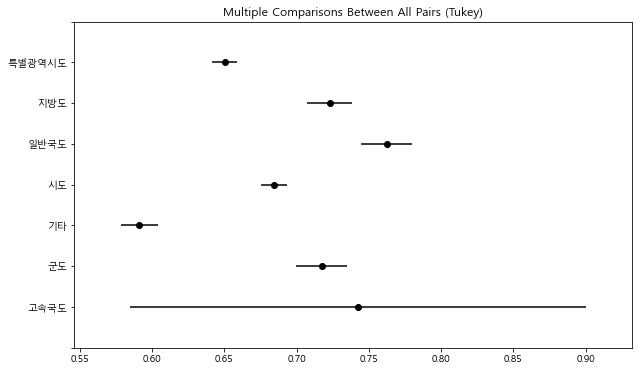

In [77]:
fig = posthoc.plot_simultaneous()

# ■ 8. 도로형태

## 8.1 EPDO1 ~ 도로형태 (O) / (O)

In [79]:
model = ols('EPDO1 ~ C(도로형태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로형태),5.0,4.545535e+05,90910.709230,19.86505,7.631288e-20
Residual,58053.0,2.656746e+08,4576.414717,NaN,NaN


In [80]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['도로형태'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
   교차로     기타 -10.7403  0.001 -15.2042 -6.2764   True
   교차로  기타/불명  -5.7887 0.1174 -12.3248  0.7475  False
   교차로    단일로   1.2429 0.2848    -0.44  2.9257  False
   교차로     불명   9.5583    0.9 -24.5464  43.663  False
   교차로    주차장 -18.3787  0.001   -28.07 -8.6874   True
    기타  기타/불명   4.9516 0.4461  -2.7457  12.649  False
    기타    단일로  11.9832  0.001   7.5831 16.3832   True
    기타     불명  20.2985 0.5362 -14.0476 54.6447  False
    기타    주차장  -7.6384 0.3025  -18.148  2.8711  False
 기타/불명    단일로   7.0315 0.0248   0.5389 13.5242   True
 기타/불명     불명  15.3469 0.7805 -19.3295 50.0233  False
 기타/불명    주차장   -12.59 0.0232 -24.1332 -1.0469   True
   단일로     불명   8.3154    0.9  -25.781 42.4118  False
   단일로    주차장 -19.6216  0.001 -29.2836 -9.9595   True
    불명    주차장  -27.937 0.2157 -63.3439    7.47  False
----------------------------

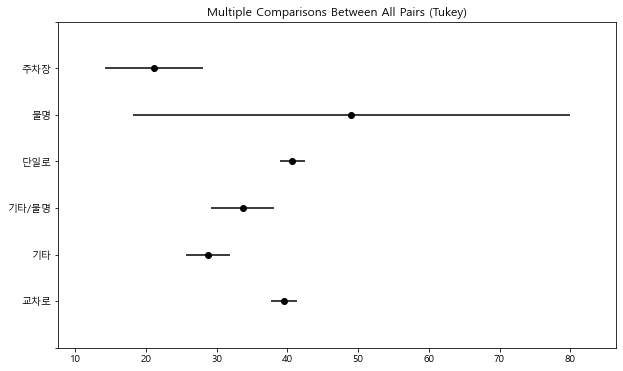

In [81]:
fig = posthoc.plot_simultaneous()

## 8.2 EPDO2 ~ 도로형태 (O) / (O)

In [82]:
model = ols('EPDO2 ~ C(도로형태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로형태),5.0,799.150978,159.830196,24.131793,2.415542e-24
Residual,58053.0,384497.835845,6.623221,NaN,NaN


In [83]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['도로형태'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   교차로     기타  -0.5108  0.001 -0.6806  -0.341   True
   교차로  기타/불명  -0.2807 0.0164 -0.5293  -0.032   True
   교차로    단일로  -0.0222    0.9 -0.0862  0.0419  False
   교차로     불명   0.4952 0.8808 -0.8023  1.7926  False
   교차로    주차장   -0.812  0.001 -1.1806 -0.4433   True
    기타  기타/불명   0.2301 0.2198 -0.0627  0.5229  False
    기타    단일로   0.4886  0.001  0.3212   0.656   True
    기타     불명    1.006 0.2402 -0.3007  2.3126  False
    기타    주차장  -0.3012 0.2632  -0.701  0.0986  False
 기타/불명    단일로   0.2585  0.034  0.0115  0.5055   True
 기타/불명     불명   0.7759 0.5409 -0.5433  2.0951  False
 기타/불명    주차장  -0.5313 0.0075 -0.9704 -0.0921   True
   단일로     불명   0.5173 0.8525 -0.7798  1.8145  False
   단일로    주차장  -0.7898  0.001 -1.1574 -0.4222   True
    불명    주차장  -1.3071 0.0633 -2.6541  0.0398  False
----------------------------------------------

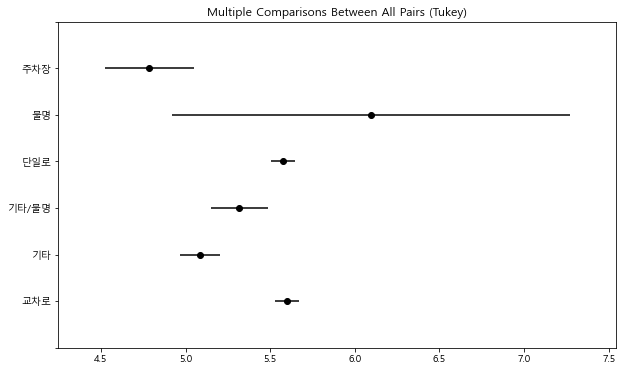

In [84]:
fig = posthoc.plot_simultaneous()

## 8.3 심각도 ~ 도로형태 (O) / (O)

In [85]:
model = ols('심각도 ~ C(도로형태)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로형태),5.0,46.404651,9.280930,42.09892,1.940307e-43
Residual,58053.0,12798.091706,0.220455,NaN,NaN


In [86]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['도로형태'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   교차로     기타  -0.1148  0.001 -0.1457 -0.0838   True
   교차로  기타/불명  -0.0815  0.001 -0.1269 -0.0361   True
   교차로    단일로  -0.0379  0.001 -0.0496 -0.0262   True
   교차로     불명   0.1151 0.7087 -0.1216  0.3518  False
   교차로    주차장  -0.1639  0.001 -0.2312 -0.0966   True
    기타  기타/불명   0.0333 0.4834 -0.0202  0.0867  False
    기타    단일로   0.0769  0.001  0.0463  0.1074   True
    기타     불명   0.2299 0.0664 -0.0085  0.4682  False
    기타    주차장  -0.0491 0.3914 -0.1221  0.0238  False
 기타/불명    단일로   0.0436 0.0646 -0.0015  0.0887  False
 기타/불명     불명   0.1966 0.1826 -0.0441  0.4373  False
 기타/불명    주차장  -0.0824 0.0397 -0.1625 -0.0023   True
   단일로     불명    0.153 0.4403 -0.0837  0.3896  False
   단일로    주차장   -0.126  0.001 -0.1931 -0.0589   True
    불명    주차장   -0.279 0.0154 -0.5247 -0.0333   True
----------------------------------------------

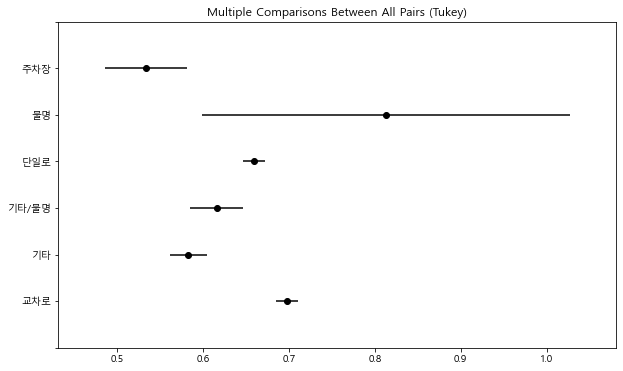

In [87]:
fig = posthoc.plot_simultaneous()

---

# ■ 9. 도로선형

## 9.1 EPDO1 ~ 도로선형 (O) / (O)

In [88]:
model = ols('EPDO1 ~ C(도로선형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로선형),4.0,1.207192e+06,301798.056401,66.134888,6.444991e-56
Residual,58054.0,2.649220e+08,4563.371428,NaN,NaN


In [89]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['도로선형'], alpha=0.05)
print(posthoc)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower    upper  reject
-------------------------------------------------------
기타/서비스구역    내리막  22.4091  0.001  16.4749 28.3433   True
기타/서비스구역    오르막  22.6212  0.001  16.6284 28.6141   True
기타/서비스구역     평지  11.8396  0.001   6.7399 16.9392   True
기타/서비스구역   평지     26.262  0.001  19.6271 32.8969   True
     내리막    오르막   0.2121    0.9  -4.3181  4.7423  False
     내리막     평지 -10.5695  0.001 -13.8276 -7.3115   True
     내리막   평지     3.8529 0.2838  -1.4978  9.2037  False
     오르막     평지 -10.7817  0.001 -14.1454 -7.4179   True
     오르막   평지     3.6408 0.3544  -1.7749  9.0566  False
      평지   평지    14.4225  0.001  10.0154 18.8296   True
-------------------------------------------------------


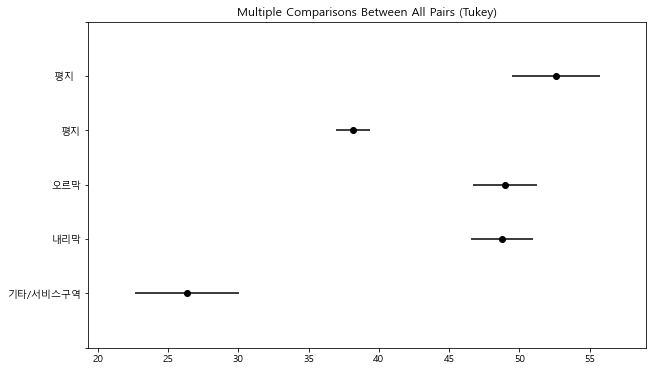

In [90]:
fig = posthoc.plot_simultaneous()

## 9.2 EPDO2 ~ 도로선형 (O) / (O)

In [91]:
model = ols('EPDO2 ~ C(도로선형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로선형),4.0,2001.170153,500.292538,75.774328,3.432685e-64
Residual,58054.0,383295.816671,6.602401,NaN,NaN


In [92]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['도로선형'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
기타/서비스구역    내리막   0.9671  0.001  0.7414  1.1928   True
기타/서비스구역    오르막   0.8498  0.001  0.6219  1.0778   True
기타/서비스구역     평지   0.4691  0.001  0.2751  0.6631   True
기타/서비스구역   평지     1.0358  0.001  0.7834  1.2881   True
     내리막    오르막  -0.1172 0.3416 -0.2896  0.0551  False
     내리막     평지   -0.498  0.001 -0.6219 -0.3741   True
     내리막   평지     0.0687 0.8829 -0.1348  0.2722  False
     오르막     평지  -0.3807  0.001 -0.5087 -0.2528   True
     오르막   평지     0.1859 0.0993 -0.0201  0.3919  False
      평지   평지     0.5667  0.001   0.399  0.7343   True
------------------------------------------------------


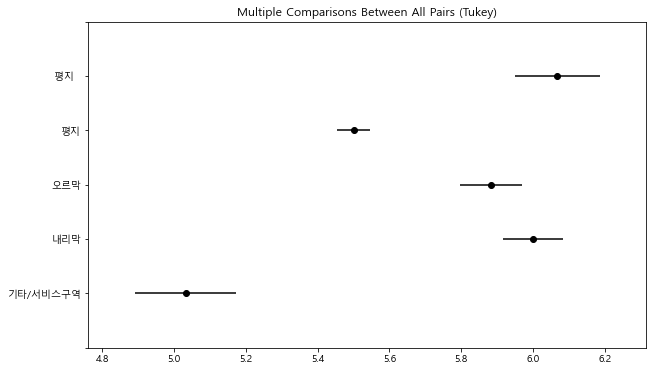

In [93]:
fig = posthoc.plot_simultaneous()

## 9.3 심각도 ~ 도로선형 (O) / (O)

In [94]:
model = ols('심각도 ~ C(도로선형)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(도로선형),4.0,27.480364,6.870091,31.117716,6.316473e-26
Residual,58054.0,12817.015993,0.220777,NaN,NaN


In [95]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['도로선형'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
기타/서비스구역    내리막    0.136  0.001  0.0947  0.1772   True
기타/서비스구역    오르막   0.1206  0.001  0.0789  0.1623   True
기타/서비스구역     평지   0.0851  0.001  0.0496  0.1205   True
기타/서비스구역   평지     0.1435  0.001  0.0974  0.1897   True
     내리막    오르막  -0.0154 0.6492 -0.0469  0.0161  False
     내리막     평지  -0.0509  0.001 -0.0736 -0.0283   True
     내리막   평지     0.0076    0.9 -0.0297  0.0448  False
     오르막     평지  -0.0355  0.001 -0.0589 -0.0121   True
     오르막   평지      0.023 0.4591 -0.0147  0.0606  False
      평지   평지     0.0585  0.001  0.0278  0.0891   True
------------------------------------------------------


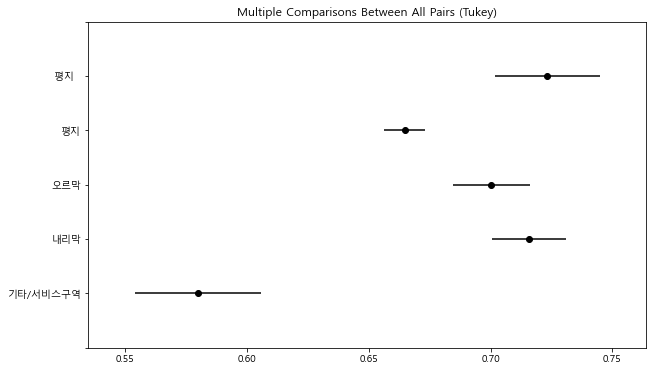

In [96]:
fig = posthoc.plot_simultaneous()

---

# ■ 10. 발생시각

## 10.1 EPDO1 ~ 발생시각 (O) / (O)

In [98]:
model = ols('EPDO1 ~ C(발생시각)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(발생시각),7.0,6.151157e+06,878736.776170,196.214867,5.858005e-289
Residual,58051.0,2.599780e+08,4478.441365,NaN,NaN


In [99]:
posthoc = pairwise_tukeyhsd(df['EPDO1'], df['발생시각'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
02-04시 05-07시 -15.1421  0.001 -21.6956  -8.5886   True
02-04시 08-10시 -39.1459  0.001 -45.4298 -32.8621   True
02-04시 11-13시 -41.8471  0.001 -48.1347 -35.5595   True
02-04시 14-16시 -42.4841  0.001 -48.7603 -36.2078   True
02-04시 17-19시 -30.5149  0.001 -36.7721 -24.2576   True
02-04시 20-22시 -23.9181  0.001 -30.5202  -17.316   True
02-04시 23-01시 -16.0849  0.001 -24.5057  -7.6642   True
05-07시 08-10시 -24.0038  0.001 -27.3215 -20.6861   True
05-07시 11-13시  -26.705  0.001 -30.0298 -23.3802   True
05-07시 14-16시  -27.342  0.001 -30.6453 -24.0386   True
05-07시 17-19시 -15.3728  0.001 -18.6398 -12.1057   True
05-07시 20-22시   -8.776  0.001  -12.663   -4.889   True
05-07시 23-01시  -0.9428    0.9  -7.4566   5.5709  False
08-10시 11-13시  -2.7012 0.0595  -5.4567   0.0543  False
08-10시 14-16시  -3.3381 0.0052  -6.0677  -0.6086   True
08-10시 17-

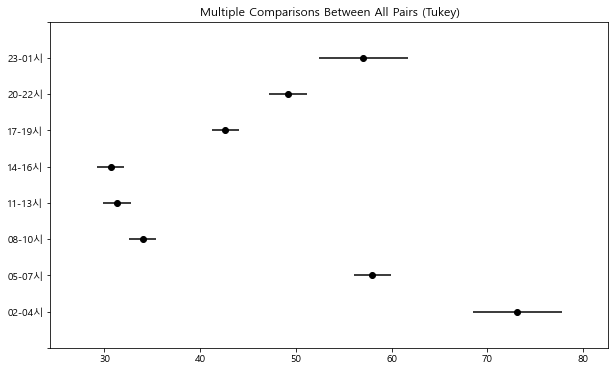

In [100]:
fig = posthoc.plot_simultaneous()

## 10.2 EPDO2 ~ 발생시각 (O) / (O)

In [101]:
model = ols('EPDO2 ~ C(발생시각)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(발생시각),7.0,8002.447376,1143.206768,175.895194,7.255059e-259
Residual,58051.0,377294.539448,6.499363,NaN,NaN


In [102]:
posthoc = pairwise_tukeyhsd(df['EPDO2'], df['발생시각'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
02-04시 05-07시  -0.4452  0.001 -0.6948 -0.1955   True
02-04시 08-10시  -1.2916  0.001  -1.531 -1.0522   True
02-04시 11-13시  -1.4395  0.001 -1.6791    -1.2   True
02-04시 14-16시  -1.4999  0.001  -1.739 -1.2608   True
02-04시 17-19시  -1.0617  0.001 -1.3001 -0.8234   True
02-04시 20-22시  -0.8197  0.001 -1.0712 -0.5682   True
02-04시 23-01시  -0.4953  0.001  -0.816 -0.1745   True
05-07시 08-10시  -0.8464  0.001 -0.9728   -0.72   True
05-07시 11-13시  -0.9944  0.001  -1.121 -0.8677   True
05-07시 14-16시  -1.0547  0.001 -1.1805 -0.9288   True
05-07시 17-19시  -0.6166  0.001  -0.741 -0.4921   True
05-07시 20-22시  -0.3745  0.001 -0.5226 -0.2264   True
05-07시 23-01시  -0.0501    0.9 -0.2982  0.1981  False
08-10시 11-13시   -0.148  0.001 -0.2529  -0.043   True
08-10시 14-16시  -0.2083  0.001 -0.3123 -0.1043   True
08-10시 17-19시   0.2298  0.001  0.1275  0.3321 

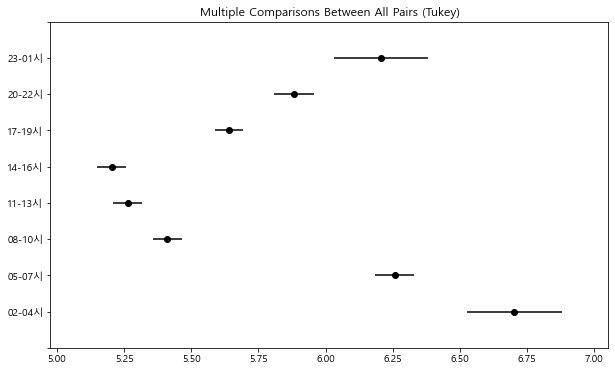

In [103]:
fig = posthoc.plot_simultaneous()

## 10.3 심각도 ~ 발생시각 (O) / (O)

In [104]:
model = ols('심각도 ~ C(발생시각)', df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(발생시각),7.0,124.497657,17.785380,81.168174,6.716329e-118
Residual,58051.0,12719.998700,0.219118,NaN,NaN


In [105]:
posthoc = pairwise_tukeyhsd(df['심각도'], df['발생시각'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
02-04시 05-07시   -0.011    0.9 -0.0568  0.0348  False
02-04시 08-10시  -0.1165  0.001 -0.1605 -0.0726   True
02-04시 11-13시  -0.1546  0.001 -0.1986 -0.1106   True
02-04시 14-16시  -0.1652  0.001 -0.2091 -0.1213   True
02-04시 17-19시  -0.1143  0.001 -0.1581 -0.0706   True
02-04시 20-22시  -0.1029  0.001 -0.1491 -0.0567   True
02-04시 23-01시  -0.0705  0.007 -0.1294 -0.0116   True
05-07시 08-10시  -0.1055  0.001 -0.1287 -0.0823   True
05-07시 11-13시  -0.1436  0.001 -0.1669 -0.1204   True
05-07시 14-16시  -0.1542  0.001 -0.1773 -0.1311   True
05-07시 17-19시  -0.1033  0.001 -0.1262 -0.0805   True
05-07시 20-22시  -0.0919  0.001 -0.1191 -0.0647   True
05-07시 23-01시  -0.0595 0.0019  -0.105 -0.0139   True
08-10시 11-13시  -0.0381  0.001 -0.0573 -0.0188   True
08-10시 14-16시  -0.0486  0.001 -0.0677 -0.0295   True
08-10시 17-19시   0.0022    0.9 -0.0166   0.021 

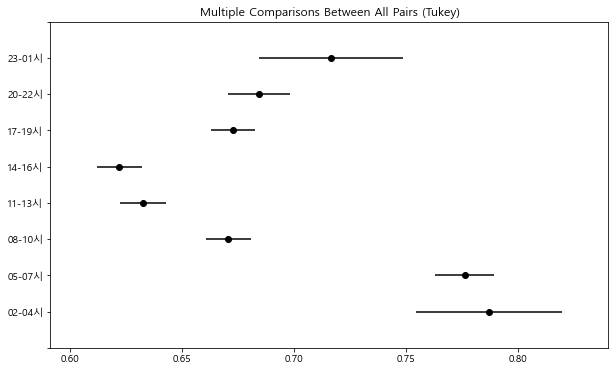

In [106]:
fig = posthoc.plot_simultaneous()